<a href="https://colab.research.google.com/github/Quan21046403/Ai/blob/main/SeaAnimalsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np
from sklearn.model_selection import train_test_split
from keras.datasets import cifar100
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.models import Sequential, Model
from keras import Input
from keras.layers import LeakyReLU
from keras.optimizers import Adam

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
from numpy import asarray

folder = '/content/drive/MyDrive/SeaAnimals/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('CLOWNFISH'):
    output = 0
  if file.startswith('CRAB'):
    output = 1
  if file.startswith('JELLYFISH'):
    output = 2
  if file.startswith('OTTER'):
    output = 3
  if file.startswith('PENGUIN'):
    output = 4
  if file.startswith('SEA_TURTLE'):
    output = 5
  if file.startswith('SEAGULL'):
    output = 6
  if file.startswith('SHRIMP'):
    output = 7
  if file.startswith('STARFISH'):
    output = 8
  if file.startswith('WHALE'):
    output = 9
  photo = load_img(folder + file, target_size=(128, 128))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/SeaAnimals/SEAANIMALS_PHOTOS', photos)
save('/content/drive/MyDrive/SeaAnimals/SEAANIMALS_LABELS', labels)

(4833, 128, 128, 3) (4833,)


In [13]:
# Load images and labels
from keras.utils import to_categorical #one hot encoding
photos = np.load('/content/drive/MyDrive/SeaAnimals/SEAANIMALS_PHOTOS.npy')
labels = np.load('/content/drive/MyDrive/SeaAnimals/SEAANIMALS_LABELS.npy')
labels_one_hot = to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(photos, labels_one_hot, test_size = 0.2, random_state = 128)

In [14]:
model = Sequential()
#Convolutional
model.add(Conv2D(8, kernel_size= (3,3), activation= 'relu', input_shape = (128,128,3), padding= 'same'))
model.add(Conv2D(8, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(16, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(16, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(64, kernel_size= (2,2), activation= 'relu', padding= 'same'))
model.add(Conv2D(64, kernel_size= (2,2), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

# Fully connected layers
model.add(Flatten())
model.add(Dense(512, activation= 'relu'))
model.add(Dropout(0.25))
model.add(Dense(512, activation= 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation= 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 8)       224       
                                                                 
 conv2d_11 (Conv2D)          (None, 128, 128, 8)       584       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 64, 64, 16)        1168      
                                                                 
 conv2d_13 (Conv2D)          (None, 64, 64, 16)        2320      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                  

In [15]:
x_train.shape

(3866, 128, 128, 3)

In [16]:
y_train.shape

(3866, 10)

In [17]:
# Training
batch_size= 16
epochs= 40   

model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])
train=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1)
eval = model.evaluate(x_test, y_test)
print('Test loss: ', eval[0])
print('Test accuracy: ', eval[1])

Epoch 1/40
242/242 [==============================] - 6s 20ms/step - loss: 1.8949 - accuracy: 0.2807
Epoch 2/40
242/242 [==============================] - 3s 13ms/step - loss: 1.3481 - accuracy: 0.5207
Epoch 3/40
242/242 [==============================] - 2s 9ms/step - loss: 1.0494 - accuracy: 0.6487
Epoch 4/40
242/242 [==============================] - 2s 9ms/step - loss: 0.8923 - accuracy: 0.6930
Epoch 5/40
242/242 [==============================] - 2s 9ms/step - loss: 0.7569 - accuracy: 0.7375
Epoch 6/40
242/242 [==============================] - 2s 10ms/step - loss: 0.6917 - accuracy: 0.7610
Epoch 7/40
242/242 [==============================] - 2s 10ms/step - loss: 0.6392 - accuracy: 0.7794
Epoch 8/40
242/242 [==============================] - 2s 10ms/step - loss: 0.5789 - accuracy: 0.8076
Epoch 9/40
242/242 [==============================] - 2s 9ms/step - loss: 0.5278 - accuracy: 0.8238
Epoch 10/40
242/242 [==============================] - 2s 9ms/step - loss: 0.4954 - accuracy: 0

In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Accuracy:", test_acc)
print('Loss:', test_loss)

31/31 [==============================] - 0s 9ms/step - loss: 0.8381 - accuracy: 0.8097
Accuracy: 0.8097208142280579
Loss: 0.8380839824676514


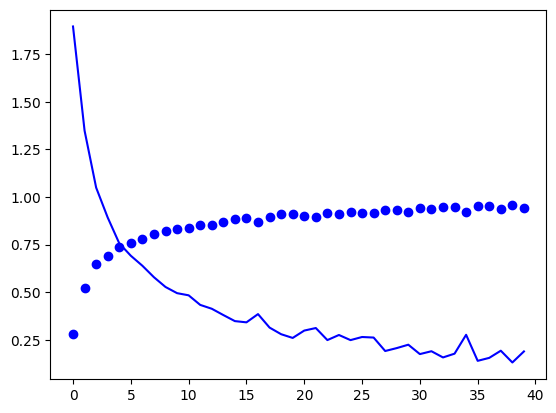

In [19]:
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, loss, 'b', label = 'Traning loss')
plt.show()

In [20]:
#Save model
model.save('/content/drive/MyDrive/AI/MODEL_SEA.h5')